## Problem - classify the loan_status variable (approved/not approved) for potential applicants

In [29]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset  
df = pd.read_csv("loan_data.csv")

In [30]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [32]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [4]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [5]:
#2 Checking duplicates

df.duplicated().sum()

np.int64(0)

In [6]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

# EDA

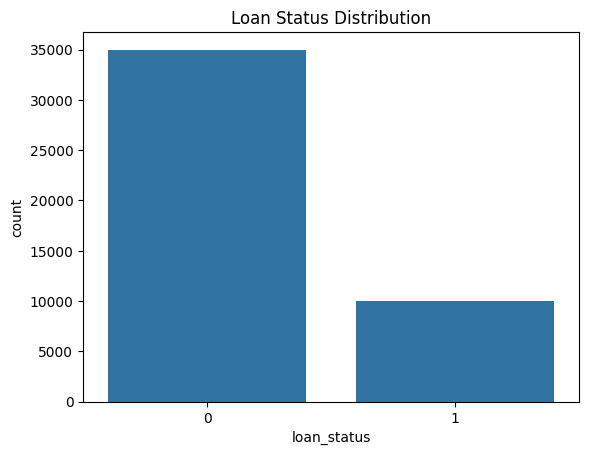

In [7]:
# check class distribution loan approval

sns.countplot(x=df['loan_status'])
plt.title('Loan Status Distribution')
plt.show()

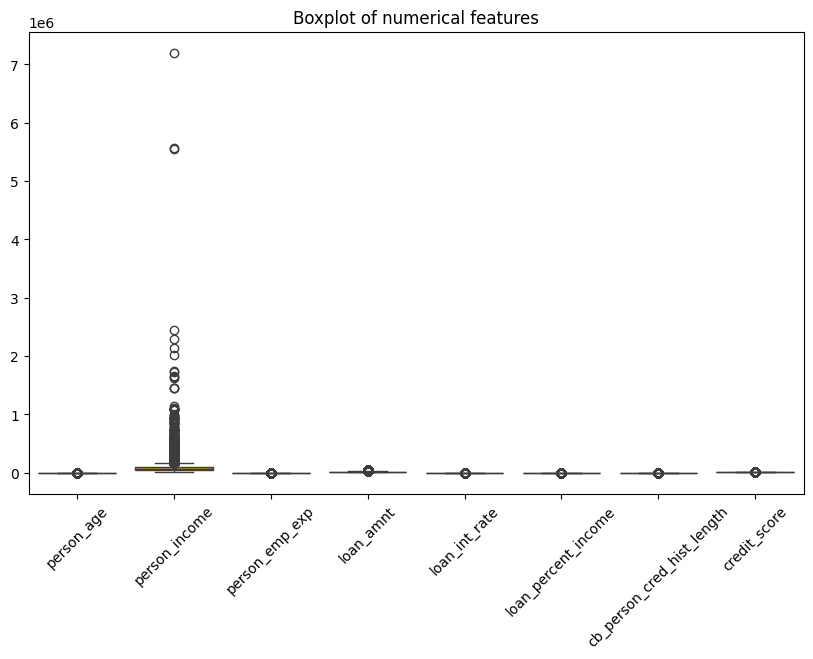

In [8]:

# Check outliers

plt.figure(figsize=(10,6))
sns.boxplot(data=df[['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']])
plt.xticks(rotation=45)
plt.title('Boxplot of numerical features')
plt.show()

## Handling outliers

In [9]:
# Applying Log transformation to person_income to reduce skewness

df['person_income'] = np.log1p(df['person_income'])

In [10]:
df['person_gender'].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

In [11]:
df['person_education'].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [12]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

In [13]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [14]:
df['previous_loan_defaults_on_file'].value_counts()

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

In [15]:
# One-Hot Encoding for multi-category features
df = pd.get_dummies(df, columns=['person_education', 'person_home_ownership',
                                 'loan_intent', 'previous_loan_defaults_on_file'],drop_first=True)


# Binary Encoding for gender
df['person_gender'] = df['person_gender'].map({'female':0 , 'male':1})

In [16]:
# Converting bool datatype to int 

bool_columns = df.select_dtypes(include=['bool']).columns

df[bool_columns] = df[bool_columns].astype(int)

In [17]:
df.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,0,11.183713,0,35000.0,16.02,0.49,3.0,561,1,...,1,0,0,1,0,0,0,1,0,0
1,21.0,0,9.415971,0,1000.0,11.14,0.08,2.0,504,0,...,0,0,1,0,1,0,0,0,0,1
2,25.0,0,9.428592,3,5500.0,12.87,0.44,3.0,635,1,...,0,0,0,0,0,0,1,0,0,0
3,23.0,0,11.286702,0,35000.0,15.23,0.44,2.0,675,1,...,0,0,0,1,0,0,1,0,0,0
4,24.0,1,11.099469,1,35000.0,14.27,0.53,4.0,586,1,...,1,0,0,1,0,0,1,0,0,0


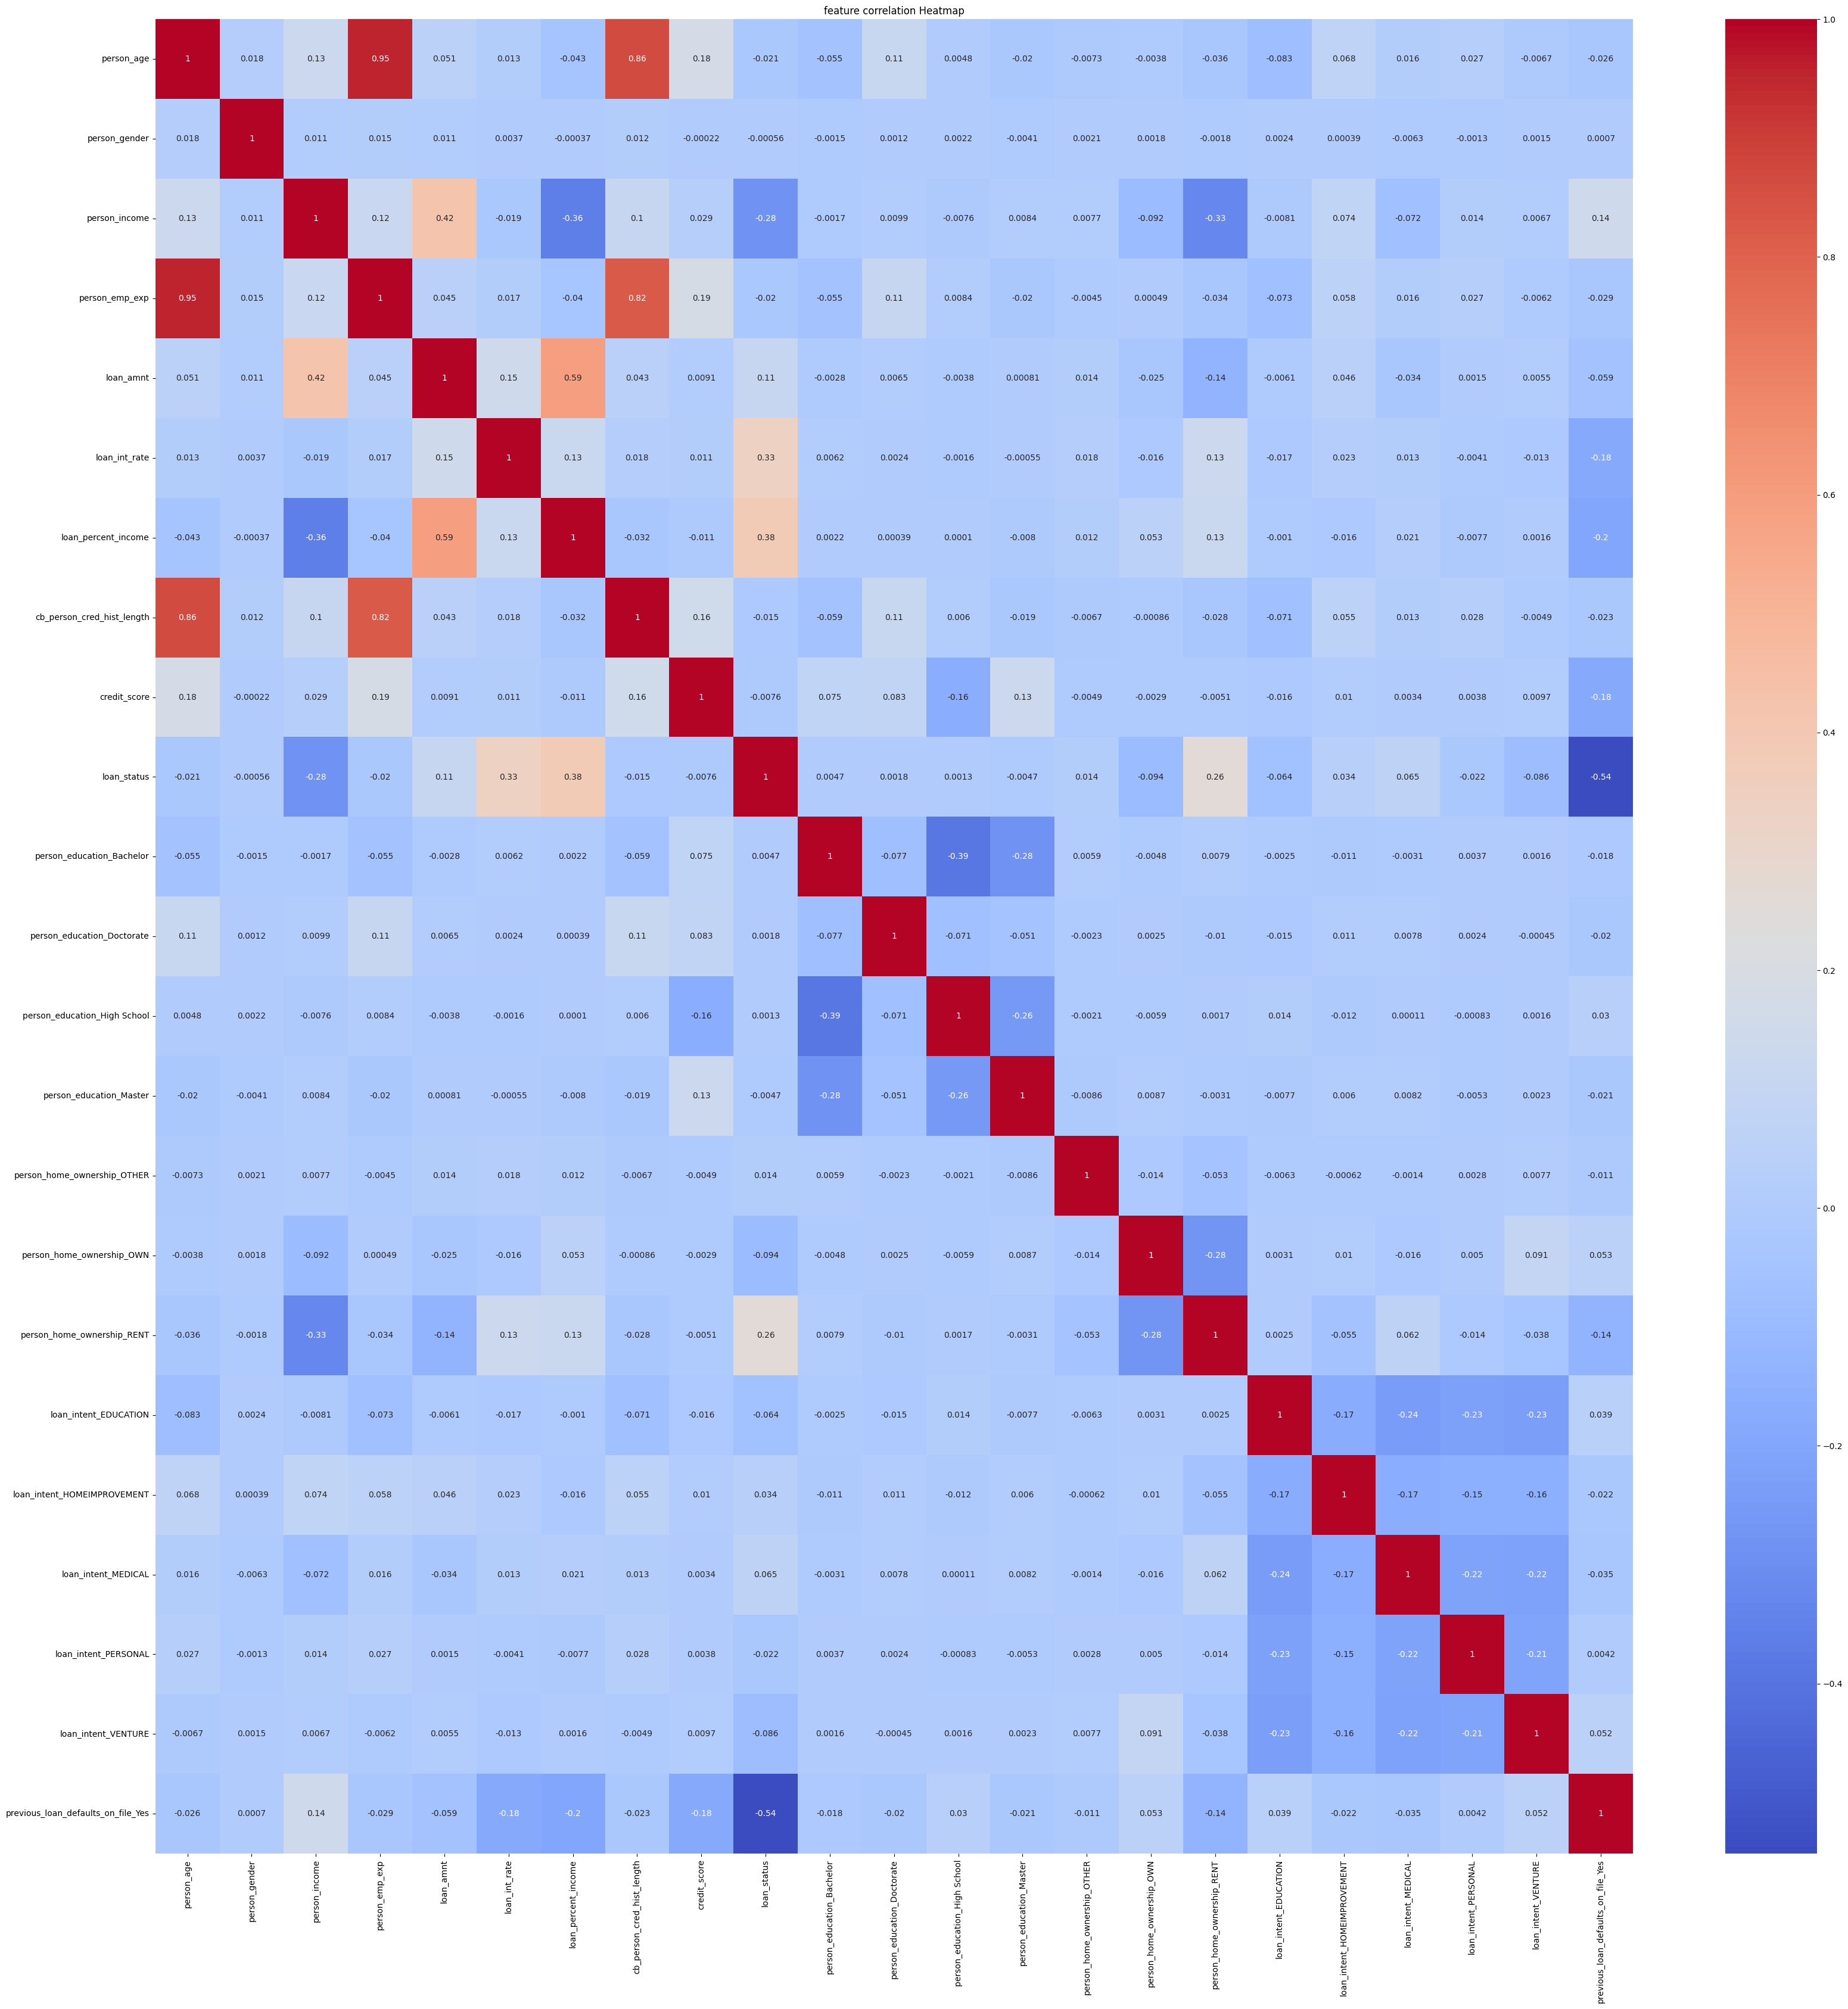

In [18]:
#4 checking correlation

plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('feature correlation Heatmap')
plt.show()

In [19]:
df.corr()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
person_age,1.000000,0.017528,0.131005,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476,...,-0.020228,-0.007321,-0.003848,-0.035974,-0.082782,0.068081,0.016351,0.026834,-0.006695,-0.025917
person_gender,0.017528,1.000000,0.011223,0.015078,0.010647,0.003662,-0.000367,0.011999,-0.000223,-0.000561,...,-0.004088,0.002118,0.001802,-0.001794,0.002369,0.000388,-0.006344,-0.001300,0.001502,0.000704
person_income,0.131005,0.011223,1.000000,0.118452,0.422789,-0.019272,-0.360581,0.103123,0.028839,-0.283465,...,0.008414,0.007742,-0.092466,-0.328023,-0.008121,0.073580,-0.072479,0.014131,0.006733,0.144924
person_emp_exp,0.954412,0.015078,0.118452,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481,...,-0.019723,-0.004535,0.000490,-0.034499,-0.072846,0.058164,0.016102,0.026863,-0.006156,-0.029231
loan_amnt,0.050750,0.010647,0.422789,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714,...,0.000806,0.013738,-0.025290,-0.136521,-0.006062,0.045657,-0.034140,0.001476,0.005500,-0.059009
loan_int_rate,0.013402,0.003662,-0.019272,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005,...,-0.000555,0.017592,-0.015953,0.130044,-0.017332,0.022505,0.012609,-0.004051,-0.013177,-0.181800
loan_percent_income,-0.043299,-0.000367,-0.360581,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880,...,-0.007982,0.011520,0.052900,0.125282,-0.001033,-0.015604,0.020547,-0.007713,0.001601,-0.203252
cb_person_cred_hist_length,0.861985,0.011999,0.103123,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851,...,-0.019320,-0.006692,-0.000855,-0.027891,-0.070653,0.054821,0.013298,0.027952,-0.004942,-0.022640
credit_score,0.178432,-0.000223,0.028839,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647,...,0.126385,-0.004865,-0.002891,-0.005051,-0.015508,0.010228,0.003359,0.003795,0.009705,-0.183005
loan_status,-0.021476,-0.000561,-0.283465,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000,...,-0.004741,0.013645,-0.093666,0.255239,-0.064006,0.033838,0.065195,-0.022488,-0.085992,-0.543096


In [20]:
# Correlation greater than 0.8

corr_matrix = df.corr()

high_corr = corr_matrix[corr_matrix > 0.8]

# Excluding self-correlation(diagonal values)
np.fill_diagonal(high_corr.values, np.nan)

# drop row /columns with all NaN values (no high correlation)
high_corr = high_corr.dropna(how='all').dropna(axis=1, how='all')

In [21]:
high_corr

,person_age,person_emp_exp,cb_person_cred_hist_length
person_age,NaN,0.954412,0.861985
person_emp_exp,0.954412,NaN,0.824272
cb_person_cred_hist_length,0.861985,0.824272,NaN


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

num_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 
                'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

# Createing DataFrame for VIF
X_vif = df[num_features]

#VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

# Display VIF
print(vif_data)

                      Feature         VIF
0                  person_age   86.786025
1               person_income  182.179020
2                   loan_amnt    6.593165
3               loan_int_rate   14.728341
4         loan_percent_income    6.515611
5  cb_person_cred_hist_length   12.669231
6                credit_score  151.390769


In [23]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns
num_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 
            'loan_percent_income','cb_person_cred_hist_length', 'credit_score']

# Apply Standardization
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

num_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 
                'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

# Createing DataFrame for VIF
X_vif = df[num_features]

#VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

# Display VIF
print(vif_data)

                      Feature       VIF
0                  person_age  3.950560
1               person_income  4.147914
2                   loan_amnt  5.569466
3               loan_int_rate  1.033398
4         loan_percent_income  5.188113
5  cb_person_cred_hist_length  3.893609
6                credit_score  1.033037


In [25]:
df.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,-0.953538,0,0.109877,0,4.024953,1.683039,4.016394,-0.739109,-1.419814,1,...,1,0,0,1,0,0,0,1,0,0
1,-1.118963,0,-3.060977,0,-1.359209,0.044782,-0.684829,-0.996863,-2.549975,0,...,0,0,1,0,1,0,0,0,0,1
2,-0.457264,0,-3.038339,3,-0.646600,0.625557,3.443074,-0.739109,0.047412,1,...,0,0,0,0,0,0,1,0,0,0
3,-0.788113,0,0.294612,0,4.024953,1.417829,3.443074,-0.996863,0.840507,1,...,0,0,0,1,0,0,1,0,0,0
4,-0.622689,1,-0.041235,1,4.024953,1.095549,4.475050,-0.481354,-0.924130,1,...,1,0,0,1,0,0,1,0,0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   person_age                          45000 non-null  float64
 1   person_gender                       45000 non-null  int64  
 2   person_income                       45000 non-null  float64
 3   person_emp_exp                      45000 non-null  int64  
 4   loan_amnt                           45000 non-null  float64
 5   loan_int_rate                       45000 non-null  float64
 6   loan_percent_income                 45000 non-null  float64
 7   cb_person_cred_hist_length          45000 non-null  float64
 8   credit_score                        45000 non-null  float64
 9   loan_status                         45000 non-null  int64  
 10  person_education_Bachelor           45000 non-null  int64  
 11  person_education_Doctorate          45000

In [28]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

# Saving cleaned data 

In [27]:
df.to_csv('Cleaned_data_Linear.csv', index=False)